# Lesson 5. Skewness and kurtosis

We also want to measure the kurtosis and skewness.

Kurtosis measures the tail of the distribution. If the kurtosis is high, it will have heavy tails (outliers).
Skewness can be described as the lack of symmetry. If a distribution is symmetric, it will be the same when you flip it horizontally from a center point.


We can use the histogram to see more apreciate this measures. This image shows a sample with negative symmetry (if it is right-skewed) and with positive symmetry (if it is left-skewed).

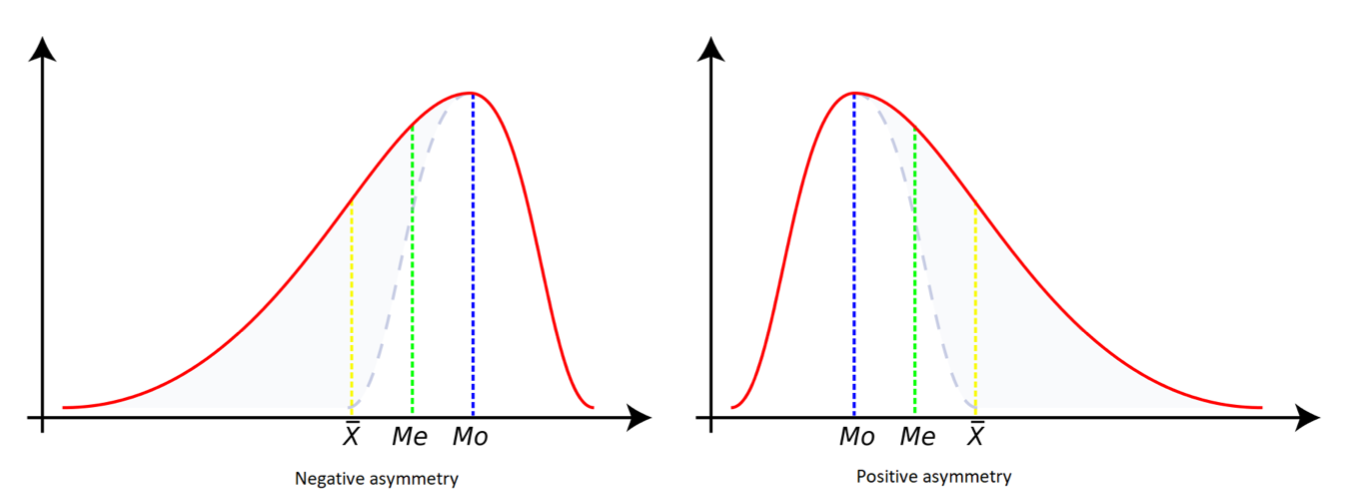

Image source: https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica

**Sample skewness**: we call the sample skewness the degree of skewness or the degree by which the sample deviates from symmetry.

If our sample has positive skewness we say that the sample is right-skewed or positively skewed. If the opposite occurs, it is said to be left-skewed or negatively skewed. We have given an intuitive idea of the skewness of our sample, but we can quantify it with a numerical approximation; one of the frequent ones is Pearson’s coefficient of skewness.


**Pearson’s coefficient**: We call Pearson’s coefficient of skewness the quotient:

$Sesgo=\frac{\bar{x}-M o}{s}$

It can only be used if our sample has a uniform, unimodal and moderately skewed distribution. It is based on the fact that in symmetrical distributions, the mean of the distribution is equal to the mode. If the distribution is symmetric, μ = Mo and Sesgo = 0. If the distribution is positively skewed, the mean is greater than the mode and, therefore, Sesgo > 0.

Given a sample ${x_{1},x_{2},...,x_{n}} ∈ R$, the r-th central moment or with respect to the mean x̄, is defined as the quantity::

$m_{r}=\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{r}$

If the sample is weighted or the data $x_1, x_2, . . . , x_n$ are represented with
frequencies moment or
$f_{1}, f_{2}, . . . , f_{n}$, which is equivalent to the data being grouped, with respect to the mean is met:

$m_{r}=\frac{1}{n} \sum_{i=1}^{n} f_{i} \cdot\left(x_{i}-\bar{x}\right)^{r}$

Another measure of symmetry uses these moments to estimate them:

**Fisher’s coefficient**: We call Fisher’s coefficient of skewness:

$g_{1}=\frac{m_{3}}{s^{3}}$

If the sample has a symmetric distribution, both coefficients, Pearson’s and Fisher’s, are equal to 0; if it is right-skewed, both are positive; and if it is left-skewed, both are negative.

**Coefficient of kurtosis**: We call coefficient of kurtosis a measure that allows to analyze the concentration of the data around the average values of the sample; and it is defined as:

$\beta_{2}=\frac{m_{4}}{s^{4}}$

It is most often interpreted by taking the normal distribution as a reference, subtracting 3, which is the kurtosis of the normal or Gaussian distribution, also called excess kurtosis:

$g_{2}=\frac{m_{4}}{s^{4}}-3$

## 5.1.1. Standardization

If we have a sample, ${x{1}, x_{2}, . . . , x_{n}} ∈ R$, with mean x ̄ and standard deviation s, we can
create a new sample, $z_{i}=\frac{x_{i}-\bar{x}}{s} \forall i$, with the characteristic that its mean is zero and its standard deviation is 1. This is a process that we know as standardization, or normalization, of our data, and it allows us to obtain data independent of the unit, or of the chosen scale.

Standardization is used a lot in neural networks problems because sometimes we get values too distant from each other and it makes learning difficult.

## 5.2. Examples

### Example 1. Asymmetrical distribution

We will generate a random asymmetrical distribution with the scipy library using skewnorm.rvs. The *rvs* function takes as arguments:


*   **a**: The skewness of the distribution. If the skweness were 0 it will be exactly like a normal distribution
*   **loc**: Allows us to move the 'center' of the distribution
*   **scale**: The standard deviation of the distribution
*   **size**: How many numbers we want



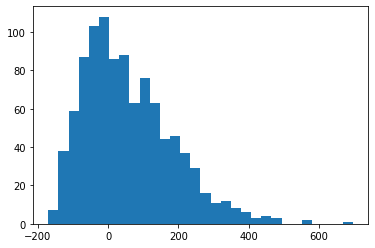

In [ ]:
from scipy.stats import skewnorm
from matplotlib import pyplot as plt

data = skewnorm.rvs(a=5, loc=-100, scale=200, size=1000).astype(int)
# the bins argument specifies how many blue bars we want in the plot
plt.hist(data, bins=30)
# I will use this function so that it doesnt print the array as numbers first
plt.show()

### Example 2. Mean, mode, median.

Now we will calculate the mean, mode and median of the distribution using three different libraries.

In [ ]:
import numpy as np
from scipy import stats
import statistics
# We use the numpy library to obtain the mean
mean = np.mean(data)
# stats.mode returns the mode and how many times its frequency so i use just the first value
mode = stats.mode(data)[0][0]
# The statistics library can calculate the median
median = statistics.median(data)
print("Mean: ", mean, " - Mode: ", mode, " - Median: ", median)

Mean:  57.944  - Mode:  -45  - Median:  35.0


### Example 3. Plot the distribution

We will plot the distribution with the mean, mode and median as vertical lines. We have to add each line using the *axvline* function before using the *show* function. Some of the arguments are:

*   **First argument**: X position
*   **label**: Label in the legend if shown
*   **c**: Color of the line



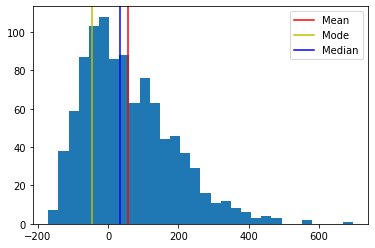

In [ ]:
plt.axvline(mean, label='Mean', c='r')
plt.axvline(mode, label='Mode', c='y')
plt.axvline(median, label='Median', c='b')

# we specify to show the legend
plt.legend()
# to show the previous histogram
plt.hist(data, bins=30)
# to avoid the printed array
plt.show()

As you can see, we get a similar graph like the shown at the beginning of the lesson.

### Example 4. Calculate Skweness.

To obtain the skweness of the distribution we can use the *skew* function from scipy

In [ ]:
stats.skew(data)

0.9000462133982658

### Example 5. Coefficient of Kurtosis.

To obtain the Kurtosis' coefficient we just need to use the kurtosis function.

In [ ]:
stats.kurtosis(data)

1.0044411230510182

We can obtain lots of usefull information using the *describe* function.

In [ ]:
stats.describe(data)

DescribeResult(nobs=1000, minmax=(-170, 696), mean=57.944, variance=16092.579443443443, skewness=0.9000462133982658, kurtosis=1.0044411230510182)

### Example 6. Standardization

To have our distribution standarized we can use the *scale* from the sklearn toolkit, a usefull library for machine learning developement.

(array([  7.,  38.,  59.,  87., 103., 108.,  86.,  88.,  63.,  76.,  63.,
         44.,  46.,  37.,  30.,  15.,  11.,  12.,   8.,   6.,   3.,   4.,
          3.,   0.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([-1.79776363, -1.57009612, -1.34242861, -1.11476109, -0.88709358,
        -0.65942607, -0.43175856, -0.20409104,  0.02357647,  0.25124398,
         0.47891149,  0.70657901,  0.93424652,  1.16191403,  1.38958154,
         1.61724906,  1.84491657,  2.07258408,  2.30025159,  2.52791911,
         2.75558662,  2.98325413,  3.21092164,  3.43858916,  3.66625667,
         3.89392418,  4.12159169,  4.34925921,  4.57692672,  4.80459423,
         5.03226174]),
 <a list of 30 Patch objects>)

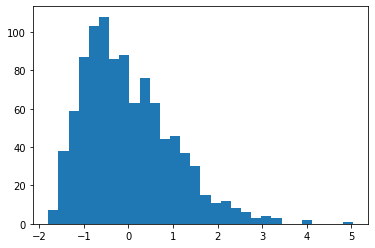

In [ ]:
from sklearn import preprocessing

standard = preprocessing.scale(data)
plt.hist(standard, bins=30)

At first, you may think that our data hasn't changed at all but the range have been reduced significantly from -2 to 4.
As I said before, this is a very common practice in machine learning, for more information check [this article about normalization](https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d#:~:text=Among%20the%20best%20practices%20for,and%20leads%20to%20faster%20convergence.).

## 5.3. Final exercise

Use this data randomly generated to complete the next exercises:

In [ ]:
data_2 = np.array([151,-29,-104,-29,-45,-18,50,-76,-2,106,-85,-64,21,27,327,22,-33,0,133,-27,-13,87,72,144,206,-6,1,-10,110,219,75,226,275,226,153,86,142,28,-36,-50,-61,165,248,7,103,372,27,126,-53,-10,245,8,11,-32,135,-59,-64,-19,261,1,313,178,156,92,-108,-54,-134,-110,110,-121,-57,208,123,-45,67,224,39,149,21,50,-43,141,-94,-71,-127,64,63,128,286,100,301,75,-48,-11,-15,44,3,55,57,-84,39,16,535,-65,105,169,113,-28,-103,-67,-25,-141,266,166,-63,171,52,354,-43,73,208,186,96,-41,231,232,98,406,150,15,310,12,-92,17,46,106,-85,-1,252,0,176,206,-71,23,-16,188,-68,137,246,-50,-66,-85,18,255,22,32,60,-144,197,117,243,127,57,144,-36,46,-87,496,-56,103,166,-62,94,-48,1,161,77,-48,22,279,26,95,103,289,19,-121,-64,-42,5,111,48,-31,40,-54,187,113,-4,-23,37,-103,-37,-151,105,65,-101,47,8,21,9,-43,-143,-80,218,59,102,478,219,54,20,-97,120,-17,224,-69,219,46,245,12,312,37,190,21,11,102,20,64,270,276,-100,-11,156,-65,25,155,50,-95,-127,111,-18,-29,170,-90,129,-44,25,-33,-62,-111,441,-43,-91,168,-29,429,-18,423,103,149,65,253,14,11,-85,70,-5,86,1,-76,497,43,-135,-50,87,212,-53,-135,113,33,-18,-5,-94,250,127,13,-21,21,13,239,0,234,-103,59,239,-34,38,68,174,129,89,91,179,126,-157,120,-17,-57,-60,-89,60,-48,94,11,296,-89,-32,159,288,40,154,-38,0,114,4,-13,-33,-78,455,-99,106,-22,-73,194,126,-123,89,16,-40,-41,10,-63,-54,-1,-46,89,27,-3,163,-1,3,301,58,19,202,106,243,-40,274,31,-8,-19,-60,-152,-11,30,-50,128,37,212,52,-38,152,-36,31,7,31,-101,241,351,1,-25,-68,32,233,75,-37,-83,177,-30,-50,45,34,124,21,43,253,50,215,33,-71,159,-91,166,-2,6,155,-41,-69,240,50,230,-10,284,-94,328,172,-176,133,-56,19,-139,68,51,-135,133,7,-32,0,-49,-2,-16,-48,233,290,246,352,206,-10,214,-28,-109,46,70,358,195,-74,28,107,31,72,-34,118,137,94,152,7,230,224,88,58,-44,-34,234,178,-24,147,370,-60,8,40,-64,221,283,116,0,-18,-61,73,139,297,218,131,357,109,113,-41,1,-7,35,-44,29,404,-50,-63,-21,18,1,9,3,-156,92,-14,149,298,49,297,-47,1,-17,37,74,116,-4,-54,-33,-34,63,-20,64,-45,28,81,333,55,31,-81,139,84,12,165,-22,211,-55,277,41,77,449,5,88,-32,109,115,-132,337,124,-79,79,62,-14,-33,84,79,45,-4,23,45,-118,111,-54,-16,142,-23,51,407,-74,134,113,-35,226,288,430,-75,7,134,98,-97,-17,165,223,140,-172,-22,125,-91,124,73,156,39,-163,-66,247,-11,-9,215,-19,4,34,-24,34,68,54,-34,20,-26,-124,364,-44,-61,304,20,8,146,-2,139,139,-51,-38,190,-1,323,43,-37,76,266,-68,35,-40,-77,-16,86,224,6,-52,209,31,114,-52,100,89,52,146,26,100,154,136,148,188,278,-71,162,-25,186,-72,228,-11,266,13,-87,122,70,82,-56,-91,20,-85,260,-56,303,8,225,80,188,-114,259,-35,8,51,-86,38,-15,242,-12,198,-35,-115,-89,138,40,-46,-28,-101,-6,195,-85,57,31,17,147,95,-72,187,-3,10,40,236,137,-38,-120,175,-150,58,178,-26,-5,35,-125,-124,269,65,174,120,-56,156,17,8,77,-41,-51,-28,-104,-1,-33,-50,-90,91,-76,-119,222,143,182,237,-19,-44,53,128,252,-116,-13,-53,9,-79,-137,59,51,170,218,-84,-20,148,102,394,-20,-50,14,195,63,30,-65,217,73,-52,75,18,200,-24,-46,9,-107,273,-105,-48,22,141,76,39,199,329,22,509,268,-70,228,53,23,-9,-31,91,67,-84,194,-66,-48,9,-43,-49,114,249,113,-32,161,92,139,-114,112,-8,74,215,4,19,337,-88,157,81,102,-65,49,18,-162,38,-109,186,275,-6,407,-17,-91,63,27,172,-72,-44,68,3,59,-96,316,52,-60,-90,161,385,-159,51,-72,187,149,36,4,126,65,-71,-1,278,65,-46,-26,-66,-45,45,277,-106,275,28,-28,352,-9,172,-86,-42,210,-100,44,158,251,96,265,110,13,64,216,322,-39,-25,-86,92,-53,-88,-60,141,-63,-104,-38,318,-135,199,466,204,497,-67,-41,178,233,-69,250,0,49,131,101,29,239,139,172,198,-51,197,-49,-78,338,98,134,327,-50,-38,214,117,167,209,87,-44,66,-49,114,68,-93,246,159,-126,105,55,319,89,98,35,78,242,-67,122,-22,95,99,-4,218,225,50,-62,-65,-27,-133,-77,165,144,-34,19,23,136,115,88,229,-1,-66,329,-15,147,-85,201,-105,-58,-9,82,-12,229])

### Exercise 1. Asymmetrical distribution

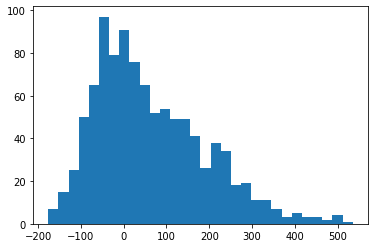

In [ ]:
# Plot the histogram with 30 bins
plt.hist(data_2, bins=30)
plt.show()

The plot should look something like this:

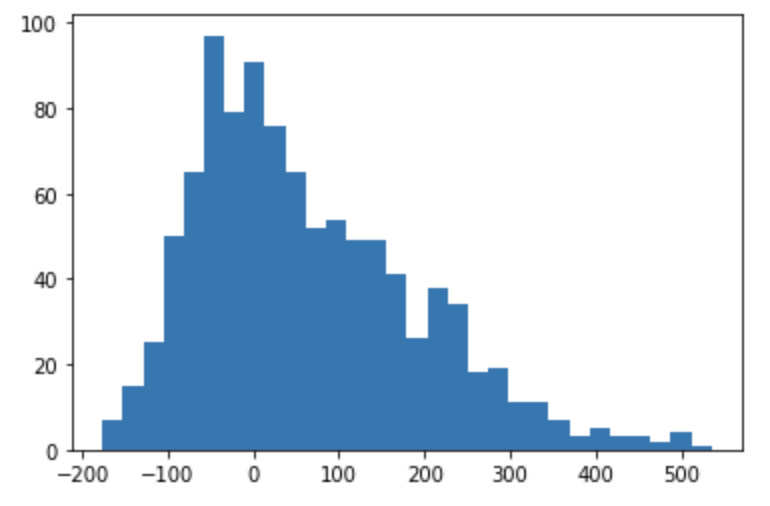

### Exercise 2. Mean, mode, median.

Calculate the mean, mode and median of the distribution.

In [ ]:
# Calculate the mean
mean = np.mean(data_2)
# Calculate the mode
mode = stats.mode(data_2)[0][0]
# Calculate the median
median = statistics.median(data_2)
print("Mean: ", mean, " - Mode: ", mode, " - Median: ", median)

Mean:  62.775  - Mode:  -50  - Median:  35.5


Result: 
* Mean:  62.775
* Mode:  -50
* Median:  35.5

### Exercise 3. Plot the distribution

Plot the histogram with the mean, mode and median as vertical lines.

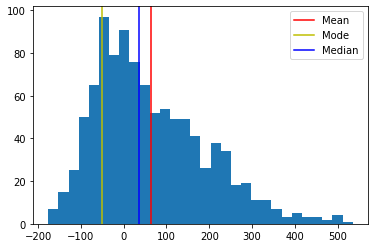

In [ ]:
# Create the three vertical lines representing the mean, mode and median
plt.axvline(mean, label='Mean', c='r')
plt.axvline(mode, label='Mode', c='y')
plt.axvline(median, label='Median', c='b')
# Now plot the histogram with the legend and vertical lines
plt.legend()
plt.hist(data_2, bins=30)
plt.show()

The plot should look something like this:

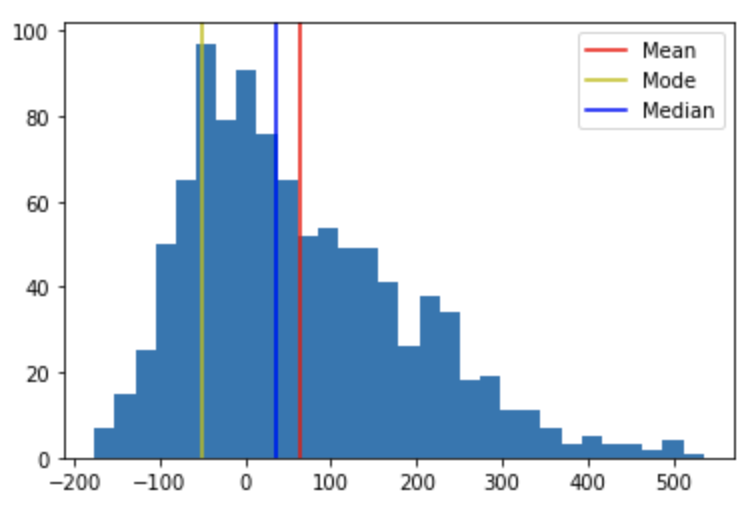

As you can see, we get a similar graph like the shown at the beginning of the lesson.

### Exercise 4. Calculate Skweness.

Calculate the skewness of the distribution.

In [ ]:
# Calculate the skewness
stats.skew(data_2)

0.7934496086632227

Result: 0.7934496086632227

### Exercise 5. Coefficient of Kurtosis.

Calculate the Kurtosis coefficient of the distribution

In [ ]:
# Calculate the Kurtosis coefficient
stats.kurtosis(data_2)

0.3377952991098421

Result: 0.3377952991098421

### Exercise 6. Standardization

Now use the sklearn library to normalize the distribution.

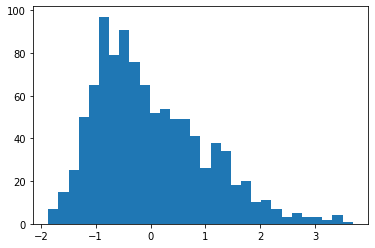

In [ ]:
# Normalize the data and plot it
standard = preprocessing.scale(data_2)
plt.hist(standard, bins=30)
plt.show()

The plot of the histogram should look like this:

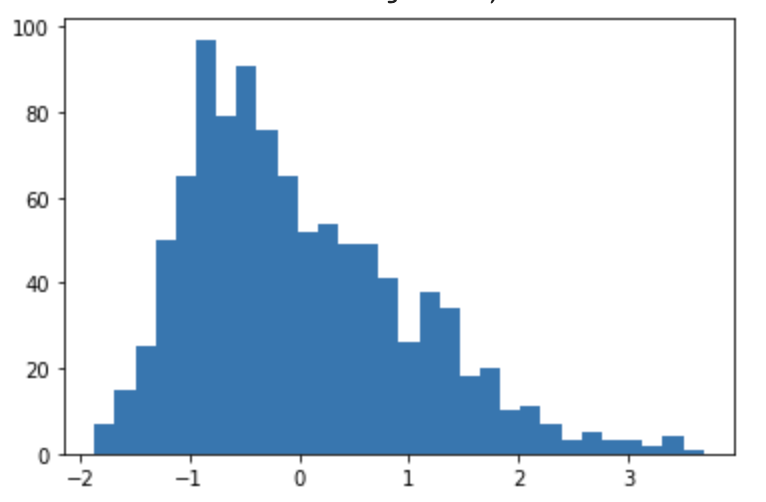